## Apple's Stock Price Prediction - Time Series Analysis with LSTM using Python's Keras Library

### By Nazri Bajuri

## Introduction

The future stock prices of the Apple Company (AAPL) is predicted, based on its stock prices of the past 5 years.


In [1]:
#import libraries

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


### Dataset

In [92]:
#load data

df = pd.read_csv("AAPL.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,79.117142,79.285713,77.375717,78.432854,69.319641,140129500
1,2013-01-03,78.268570,78.524284,77.285713,77.442856,68.444672,88241300
2,2013-01-04,76.709999,76.947144,75.118568,75.285713,66.538162,148583400
3,2013-01-07,74.571426,75.614288,73.599998,74.842857,66.146751,121039100
4,2013-01-08,75.601425,75.984283,74.464287,75.044289,66.324783,114676800


In [93]:
apple_training_complete = df

In [3]:
#extract only numbers in OPEN

apple_training_processed = df.iloc[:, 1:2].values

In [4]:
apple_training_processed

array([[ 79.117142],
       [ 78.26857 ],
       [ 76.709999],
       ...,
       [170.100006],
       [171.      ],
       [170.520004]])

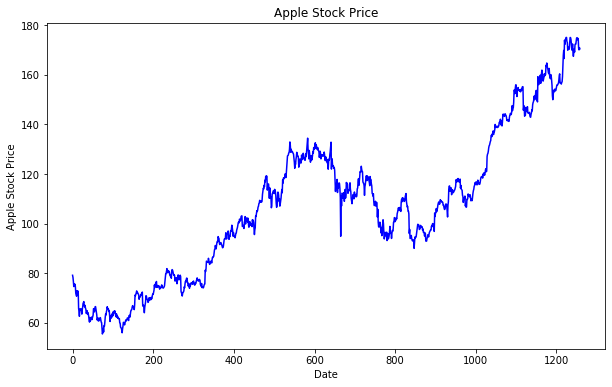

In [131]:
plt.figure(figsize=(10,6))
plt.plot(apple_training_processed, color='blue', label='Actual Apple Stock Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.show()

### Normalisation 

In [5]:
# To scale data from 0 to 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

apple_training_scaled = scaler.fit_transform(apple_training_processed)

In [6]:
apple_training_scaled

array([[0.19795893],
       [0.19086893],
       [0.17784673],
       ...,
       [0.95814041],
       [0.96566005],
       [0.96164958]])

In [7]:
y = len(apple_training_scaled)
y

1259

### Convert Training Data to Right Shape

Feature set should contain the opening stock price values for the past 60 days (the most optimum) while the label or dependent variable should be the stock price at the 61st day. The following script is to create feature and label set.

In [8]:
features_set = []
labels = []
for i in range (60,1259):
    features_set.append(apple_training_scaled[i-60:i,0])
    labels.append(apple_training_scaled[i,0])

In [9]:
len(features_set)

1199

In [10]:
len(labels)

1199

Both the feature_set and the labels list were converted to the numpy array before they are used for training. 

In [11]:
features_set, labels = np.array(features_set), np.array(labels)

In order to train LSTM on data, the data need to be converted into the shape accepted by the LSTM (three-dimensional format). The first dimension is the number of records or rows in the dataset which is 1260 in this case. The second dimension is the number of time steps which is 60 while the last dimension is the number of indicators. Since this project is only using one feature, i.e Open, the number of indicators will be one. 

In [12]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))

### Training The LSTM
The LSTM model will be a sequential model with multiple layers - add four LSTM layers to the model followed by a dense layer that predicts the future stock price.

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


Instantiate the Sequential class then later add LSTM, Dropout and Dense layers to this model.

In [14]:
model = Sequential()

### Creating LSTM and Dropout Layers

To add a layer to the sequential model, the add method is used. Inside the add method, LSTM layer is passed. The first parameter to the LSTM layer is the number of neurons or nodes in the layer. The second parameter is return_sequences, which is set to true since more layers will be added to the model. The first parameter to the input_shape is the number of time steps while the last parameter is the number of indicators.

In [15]:
model.add(LSTM(units=10, return_sequences=True, input_shape=(features_set.shape[1], 1)))

Instructions for updating:
Colocations handled automatically by placer.


#### Add dropout layer to avoid overfitting


In [16]:
model.add(Dropout(0.2))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### Add more layers

Three more LSTM and dropout layers are added to the model.

In [17]:
model.add(LSTM(units=10, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=10, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=10))
model.add(Dropout(0.2))

### Creating Dense Layer
Add a dense layer to make the model more robust, at the end of the model. The number of neurons in the dense layer will be set to 1 since a single value will be predicted in the output.



In [18]:
model.add(Dense(units = 1))

### Model Compilation
Compile the LSTM before training it on the training data. The following script compiles the our model.

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Algorithm Training
 Call the fit method to train the model

In [20]:
model.fit(features_set, labels, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1199/1199 [==============================] - 20s 17ms/step - loss: 0.1000
Epoch 2/100
1199/1199 [==============================] - 13s 10ms/step - loss: 0.0220
Epoch 3/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0124
Epoch 4/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0115
Epoch 5/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0114
Epoch 6/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0108
Epoch 7/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0101
Epoch 8/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0098
Epoch 9/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0101
Epoch 10/100
1199/1199 [==============================] - 13s 10ms/step - loss: 0.0090
Epoch 11/100
1199/1199 [==============================] - 13s 11ms/step - loss: 0.0090
Epoc

## Testing LSTM

Successfully trained the LSTM, now is the time to test the performance on the test set by predicting the opening stock prices for the month of January 2018. However, test data need to be converted into the right format.



In [119]:
# Let's first import our test data.
apple_testing_complete = pd.read_csv("AAPL_test.csv")
apple_testing_processed = apple_testing_complete.iloc[:, 0:2].values

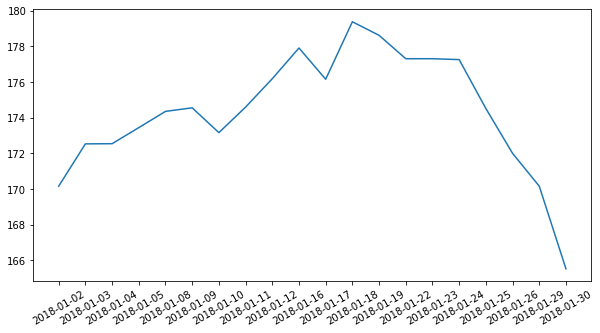

In [120]:
# Let's plot. 

x = apple_testing_processed[:,0]
y = apple_testing_processed[:,1]
plt.figure(figsize=(10,5))
plt.title
plt.plot(x,y)
plt.xticks(rotation=30)
plt.show()

The trend is highly non-linear. Overall, the stock prices see small rise at the start of the month followed by a downward trend at the end of the month, with a slight increase and decrease in the stock prices in-between. It is extremely difficult to forecast such a trend. Let's see if the trained LSTM is actually able to predict such a trend.

In [121]:
# Remove all the columns from the test data except the column that contains opening stock prices.

apple_testing_processed = apple_testing_complete.iloc[:, 1:2].values


### Converting Test Data to Right Format

For each day of January 2018, feature set should contain the opening stock prices for the previous 60 days. For the 1st of January, the stock prices must include the previous 60 days. To do so, training data and test data are needed to be concatenated before preprocessing.

<function matplotlib.pyplot.show(*args, **kw)>

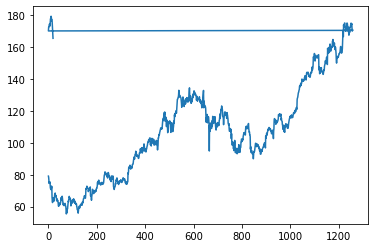

In [122]:
apple_total = pd.concat((apple_training_complete['Open'], apple_testing_complete['Open']), axis=0)

Prepare test inputs. The input for each day should contain the opening stock prices for the previous 60 days. That means opening stock prices for the 20 test days for the month of January 2018 are needed, as well as the 60 stock prices from the last 60 days for the training set.

In [123]:
test_inputs = apple_total[len(apple_total) - len(apple_testing_complete) - 60:].values

In [124]:
## Scaling

test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)

Prepare the final test input set that will contain previous 60 stock prices for the month of January. 

In [125]:
test_features = []
for i in range(60, 80):
    test_features.append(test_inputs[i-60:i, 0])

Finally, convert the data into the three-dimensional format which can be used as input to the LSTM. 

In [126]:
test_features = np.array(test_features)
test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))

### Making Predictions




In [127]:
predictions = model.predict(test_features)

Since the data were scaled, the predictions made by the LSTM are also scaled. The scaled prediction need to be rescaled back to their actual values. To do so, use the ìnverse_transform method of the scaler object created during training.

In [128]:
predictions = scaler.inverse_transform(predictions)

Finally, let's see how well the algorithm predicts the future stock prices.

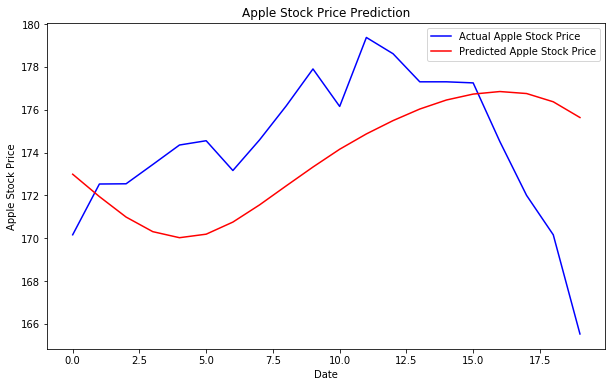

In [130]:
plt.figure(figsize=(10,6))
plt.plot(apple_testing_processed, color='blue', label='Actual Apple Stock Price')
plt.plot(predictions , color='red', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In the output, the blue line represents the actual stock prices for the month of January 2018, while the red line represents the predicted stock prices. It can be seen that the algorithm has been able to capture the overall trend. The predicted prices also see a bullish trend at the beginning followed by a bearish or downwards trend at the end. 